# Week 3: Day 5 AM // Practical Statistics: Testing

## Error Type I and II on Hypothesis Test

### Error Type I and II on Hypothesis Test

Consider the criminal trial analogy, there are two possible truth states and two possible outcomes, for four combinations in total. Two of these indicate that the verdict was correct. If a defendant didn't commit the crime, but the verdict was guilty, they are wrongfully convicted. If the defendant committed the crime but the verdict was not guilty, they got away with it. These are both errors in justice. Similarly, for hypothesis testing, there are two ways to get it right, and two types of error. If you support the alternative hypothesis when the null hypothesis was correct, you made a false positive error. If you support the null hypothesis when the alternative hypothesis was correct, you made a false negative error. These errors are sometimes known as type one and type two errors.

In addition:
- Type I error (α , also called significance level): the probability to reject H₀ (the null hypothesis) when it is true. (False positive)
- Confidence level (1 - α) : ability to produce accurate intervals that include the true parameter value if many samples were to be generated
- Type II error (β): the probability to FAIL to reject H₀ when it is false.(False negative)
- Power of the statistical test (1- β) :the probability to reject H₀ when it is false

In the case of data scientists starting coding, if we had a p-value less than or equal to the significance level, and rejected the null hypothesis, it's possible we made a false positive error. That is, we thought data scientists started coding as children at a higher rate, but this isn't true in the whole population. Conversely, if the p-value was greater than the significance level and we failed to reject the null hypothesis, it's possible we made a false negative error.

**Population: data collected from people’s weights whose mean and standard deviation are 163 lbs and 7.2 lbs respectively.**

Suppose we are conducting a hypothesis one sample z-test to check if the population parameter of the given sample group is 163 lb.

H₀: 𝜇=163

Hₐ: 𝜇≠163

No handles with labels found to put in legend.


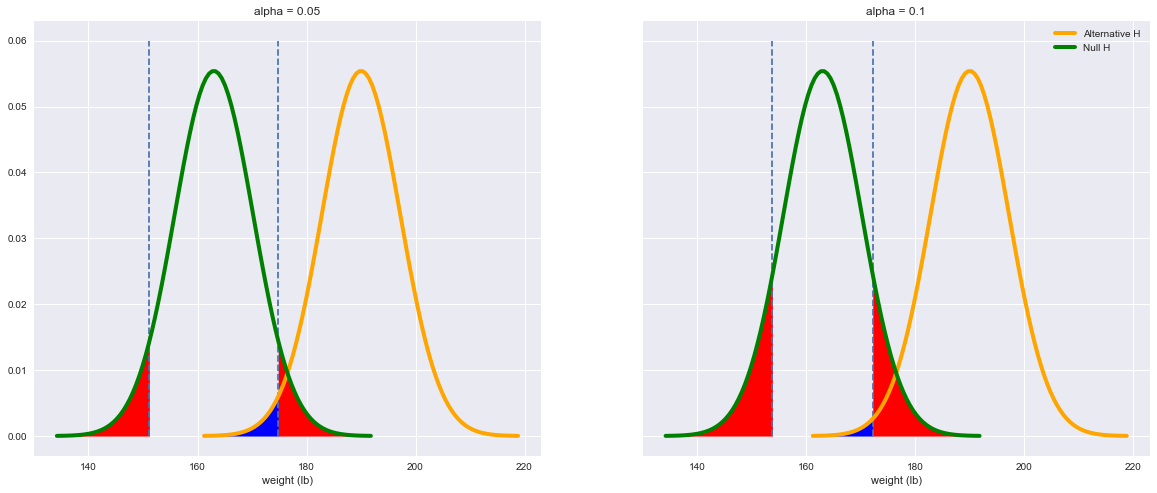

In [2]:
import numpy as np

# Import SciPy stats and matplotlib for calculating and visualising effect size
import scipy.stats
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
%matplotlib inline

# seed the random number generator so you get the same results
np.random.seed(10)

#Mean weight and sd for the distribution where the sample will be generated
gr1_mean = 190
gr1_sd = 7.2

# Generate a normal distribution for gr1 weights 
gr1_weight = scipy.stats.norm(gr1_mean, gr1_sd)

#Mean weight and sd for gr2s: True mean and std
gr2_mean = 163
gr2_sd = 7.2

# Generate a normal distribution for gr2 weights 
gr2_weight = scipy.stats.norm(gr2_mean, gr2_sd)

# to plot the PDFs
def evaluate_PDF(rv, x=4):
    '''Input: a random variable object, standard deviation
       output : x and y values for the normal distribution
       '''
    
    # Identify the mean and standard deviation of random variable 
    mean = rv.mean()
    std = rv.std()

    # Use numpy to calculate evenly spaced numbers over the specified interval (4 sd) and generate 100 samples.
    xs = np.linspace(mean - x*std, mean + x*std, 100)
    
    # Calculate the peak of normal distribution i.e. probability density. 
    ys = rv.pdf(xs)

    return xs, ys # Return calculated values

fig, axes = plt.subplots(1,2, figsize =(20,8), sharey=True)

for alpha in [0.05,0.1]:
    idx = int(alpha/0.05)-1
    
    #alternative hypothesis plot
    gr1_xs, gr1_ys = evaluate_PDF(gr1_weight)
    axes[idx].plot(gr1_xs, gr1_ys, label='Alternative H', linewidth=4, color='orange') 

    #null hypothesis plot
    gr2_xs, gr2_ys = evaluate_PDF(gr2_weight)
    axes[idx].plot(gr2_xs, gr2_ys, label='Null H', linewidth=4, color='green')
    
    #critical values
    thresh_l = gr2_weight.ppf(alpha)
    thresh_r = gr2_weight.ppf(1-alpha)

    axes[idx].vlines(thresh_r,ymin=0,ymax=0.06, linestyles ='dashed')
    axes[idx].vlines(thresh_l,ymin=0,ymax=0.06, linestyles ='dashed')

    axes[idx].fill_betweenx(gr1_ys,x1=thresh_r,x2 = gr1_xs, where = gr1_xs < thresh_r, color='b')
    axes[idx].fill_betweenx(gr2_ys,x1=gr2_xs,x2=thresh_r, where = gr2_xs > thresh_r,color='r')
    axes[idx].fill_betweenx(gr2_ys,x1=gr2_xs,x2=thresh_l, where = gr2_xs < thresh_l,color='r')
    axes[idx].set_xlabel('weight (lb)')
    axes[idx].set_title(f'alpha = {alpha}')
    plt.legend()

The sum of red parts represent the type I error by its definition: when p-value fall into the read parts, we reject H₀ when the null hypothesis is true( when population PDF is the green line). Similarly, the blue part is the type II error, we accept H₀ when it is not true (when population PDF is the orange line).
See that when alpha level increases from 0.05 to 0.1, the blue part gets smaller! You can also think of this as when you reject more, the error caused by not rejecting (fail to reject) is reduced!

### Permutation Test

Randomness is probably one of the most powerful phenomena that we have at hand when dealing with Statistics. It may not be so apparent, but under the right scope, it can help us uncover hidden patterns in data. Traditionally speaking though, we rely on analytical solutions to do Hypothesis Testing.

<img src="https://miro.medium.com/max/2970/1*92LIq7L8Last3Pcqgnygkw.gif" width=500 height=300></img>

A permutation test is basically doing what this image is doing, but to our data. We shuffle and mix everything together to get a big pool of data and compare this pool with what we had before shuffling it. It is not exactly that, but you can get an idea of what we will do here.

Generally speaking, there are two kinds of permutation tests. The first one is to assess the probability that the difference of a statistic between two distributions is explained by chance. Think of a t-test, but for any sort of metric you want, not only the mean. The second is to measure the probability that a dependency between two variables (correlation, mutual information, etc) is explained by chance. The lower this probability, the higher the significance of your test.

Kleinteich and Gorb (Sci. Rep., 4, 5225, 2014) performed an interesting experiment with South American horned frogs. They held a plate connected to a force transducer, along with a bait fly, in front of them. They then measured the impact force and adhesive force of the frog's tongue when it struck the target.

Frog A is an adult and Frog B is a juvenile. The researchers measured the impact force of 20 strikes for each frog. In the next exercise, we will test the hypothesis that the two frogs have the same distribution of impact forces.

The average strike force of Frog A was 0.71 Newtons (N), and that of Frog B was 0.42 N for a difference of 0.29 N. It is possible the frogs strike with the same force and this observed difference was by chance. You will compute the probability of getting at least a 0.29 N difference in mean strike force under the hypothesis that the distributions of strike forces for the two frogs are identical. We use a permutation test with a test statistic of the difference of means to test this hypothesis.

In [5]:
import numpy as np

force_a=np.array([1.612,0.605,0.327,0.946,0.541,1.539,0.529,0.628,1.453,0.297,0.703,0.269,0.751,0.245,1.182,0.515,0.435,0.383,0.457,0.73])
force_b=np.array([0.172,0.142,0.037,0.453,0.355,0.022,0.502,0.273,0.72,0.582,0.198,0.198,0.597,0.516,0.815,0.402,0.605,0.711,0.614,0.468])

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate([data1,data2])

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1)-np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a,force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=10000)

# Compute p-value: p
#The p-value is the fraction of your simulated data sets for 
#which the test statistic is at least as extreme as for the real data
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)


p-value = 0.0053


The p-value tells you that there is about a 0.6% chance that you would get the difference of means observed in the experiment if frogs were exactly the same. A p-value below 0.01 is typically said to be "statistically significant," but: warning! warning! warning! You have computed a p-value; it is a number. We encourage you not to distill it to a yes-or-no phrase. p = 0.006 and p = 0.000000006 are both said to be "statistically significant," but they are definitely not the same!

## A/B Testing

Imagine your company has a proposed redesign of the splash page of its website. They are interested in how many more users click through to the website for the redesign versus the original design. You devise a test.

Take a set of 1000 visitors to the site and direct 500 of them to the original splash page and 500 of them to the redesigned one. You determine whether or not each of them clicks through to the rest of the website. On the original page, which we'll call page A, 45 visitors clicked through, and on the redesigned page, page B, 67 visitors clicked through. This makes you happy because that is almost a 50% increase in the click-through rate. But maybe there really is no difference between the effect of two designs on click-through rate and the difference you saw is due the random chance. You want to check: what is the probability that you would observe at least the observed difference in number of clicks through if that were the case? This is asking exactly the question you can address with a hypothesis test. A permutation test is a good choice here because you can simulate the result as if the redesign had no effect on the click-through rate.

For each splash page design, we have a Numpy array which contains 1 or 0 values for whether or not a visitor clicked through. Next, we need to define a function diff_frac for our test statistic. Ours is the fraction of visitors who click through. We can compute the fraction who click through by summing the entries in the arrays of ones and zeros and then dividing by the number of entries. Finally we compute the observed value of the test statistic using this function diff_frac. Now everything is in place to generate our permutation replicates of the test statistic using the permutation_replicate function; we will generate 10,000. We compute the p-value as the number of replicates where the test statistic was at least as great as what we observed. We get a value of 0.016, which is relatively small, so we might reasonably think that the redesign is a real improvement. This is an example of an A/B test.

In [6]:
import numpy as np

#Generate numpy array of A and B clicks through
clickthrough_A=np.concatenate((np.full(45,1,dtype=int),np.full(500-45,0,dtype=int)),axis=0)
clickthrough_B=np.concatenate((np.full(67,1,dtype=int),np.full(500-67,0,dtype=int)),axis=0)
np.random.shuffle(clickthrough_A)
np.random.shuffle(clickthrough_B)

#The Null-hypothesis: The click-through rate is not affacted by the redesign

def diff_frac(data_A, data_B):
    frac_A = np.sum(data_A) / len(data_A)
    frac_B = np.sum(data_B) / len(data_B)
    return frac_B - frac_A #difference of means

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

# Compute difference of mean impact force from experiment
diff_frac_obs = diff_frac(clickthrough_A,clickthrough_B) # difference of means expected

# Draw 10,000 permutation replicates
perm_replicates = draw_perm_reps(clickthrough_A, clickthrough_B,diff_frac, size=10000)
    
p_value = np.sum(perm_replicates >= diff_frac_obs) / 10000
print('The p-value is %f' % p_value)

The p-value is 0.018400


A/B testing is often used by organizations to see if a change in strategy gives different, hopefully better, results. Generally,the null hypothesis in an A/B test is that your test statistic is impervious to the change. A low p-value implies that the change in strategy lead to a change in performance. Once again, though, be warned that statistical significance does not mean practical significance. A difference in click-though rate may be statistically significant, but if it is only a couple people more per day, your marketing team may not consider the change worth the cost! A/B testing is just a special case of the hypothesis testing framework we have already been working with, a fun and informative one.

# A/B Testing Practical Example

In [6]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from functools import reduce
from sklearn import preprocessing
from scipy import stats

In [35]:
df_data=pd.read_csv("data/cookie_cats.csv")
df_data=df_data[df_data['sum_gamerounds']<150]

The meaning of each column is:

- userid: A unique number that identifies each player.

- version: Whether the player was put in the control group (gate_30 - a gate at level 30) or the group with the moved gate (gate_40 - a gate at level 40). We will use this as flag to determine user group.

- sum_gamerounds: The number of game rounds played by the player during the first 14 days after install.

- retention_1: Did the player come back and play 1 day after installing?

- retention_7: Did the player come back and play 7 days after installing?

In [36]:
df_data.head(5)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
3,483,gate_40,1,False,False
6,1066,gate_30,0,False,False
7,1444,gate_40,2,False,False


In [37]:
df_data['group']=df_data['version'].replace({'gate_30': 'Control', 'gate_40': 'Test'})

## Calculating the sample size and effect Size

In [38]:
test_n = len(df_data.loc[df_data.group == 'Test'])
cont_n = len(df_data.loc[df_data.group == 'Control'])
#df_data.info()

In [39]:
from statsmodels.stats import power as pwr

# Calculate conversion rate mean and std
purchase_mean = df_data.retention_7.mean()
purchase_std = df_data.retention_7.std()

# Setting the parameters and we want to increase the purchase_mean to 0.1 in this experiment
effect_size = (0.1 - purchase_mean)/purchase_std
power = 0.8
alpha = 0.05

# Calculate ratio
sizes = [cont_n,test_n]
ratio = max(sizes)/min(sizes)

# Initialize analysis and calculate sample size
analysis = pwr.TTestIndPower()
ssresult = analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, nobs1=None, ratio=ratio)

print(f'Sample Size: {int(ssresult)}')

Sample Size: 2267


## A/B Test

In [40]:
# Find the unique users in each group 
results = df_data.groupby('group').agg({'userid': 'count'}) 

# Find the percentage in each group
results = results/len(df_data) * 100
print('Percentage of users in each group:','\n', results)

Percentage of users in each group: 
             userid
group             
Control  49.542555
Test     50.457445


In [41]:
# Find the unique users in each group, by device and gender
results = df_data.groupby(by=['group', 'retention_7']).agg({'userid': 'count'}) 

# Find the percentage in each group
results = results/len(df_data) * 100
print('Percentage of users in each group:','\n', results)

Percentage of users in each group: 
                         userid
group   retention_7           
Control False        43.002248
        True          6.540307
Test    False        44.233036
        True          6.224409


In [42]:
# Find the unique users in each group, by device and gender
results = df_data.groupby(by=['group']).agg({'sum_gamerounds': 'mean'}) 

print('Mean game rounds in each group:','\n', results)

Mean game rounds in each group: 
          sum_gamerounds
group                  
Control       27.033010
Test          27.077657


## Checking for Statistical Significance

### Mean and Standard Deviation Check

In [62]:
test = df_data[df_data.group == 'Test']
control = df_data[df_data.group == 'Control']

test_size = len(df_data[df_data.group == 'Test'])
cont_size = len(df_data[df_data.group == 'Control'])

cont_conv = control.sum_gamerounds.mean()
test_conv = test.sum_gamerounds.mean()

cont_conv_std = control.sum_gamerounds.std()
test_conv_std = test.sum_gamerounds.std()

print('Control Group Size:', cont_size)
print('Test Group Size:', test_size)

print(f'\nControl group conversion rate = {cont_conv}, std = {cont_conv_std}')
print(f'Test group conversion rate = {test_conv}, std = {test_conv_std}')

Control Group Size: 40776
Test Group Size: 41529

Control group conversion rate = 27.033009613498137, std = 32.416051299142055
Test group conversion rate = 27.077656577331503, std = 32.891581149538275


### Plotting Distribution

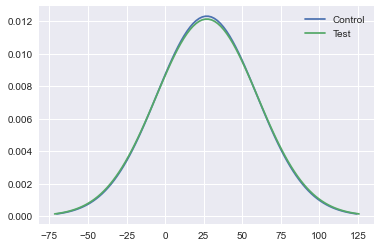

In [65]:
# Create the range of x values 
control_line = np.linspace(cont_conv - 3 * cont_conv_std, cont_conv + 3 * cont_conv_std, 100)
test_line = np.linspace(test_conv - 3 * test_conv_std ,test_conv +  3 * test_conv_std, 100)

# Plot the distribution     
plt.plot(control_line, stats.norm.pdf(control_line, cont_conv, cont_conv_std), label='Control')
plt.plot(test_line, stats.norm.pdf(test_line, test_conv, test_conv_std), label='Test')
plt.legend()
plt.show()

### T-Test

In [55]:
test_results = df_data[df_data.group == 'Test']['sum_gamerounds']
control_results = df_data[df_data.group == 'Control']['sum_gamerounds']

test_result = stats.ttest_ind(test_results, control_results)

statistic = test_result[0]
p_value = test_result[1]

print('statistic = ', statistic)
print('p_value = ', p_value)

# Check for statistical significance
if p_value >= 0.05:
    print("Not Significant")
else:
    print("Significant Result")

statistic =  0.1961022076294809
p_value =  0.8445306525251518
Not Significant


## Sample Statistics

In [67]:
subset_convs, test_sub_convs, cont_sub_convs = [], [], []
subset_convs_std, test_sub_convs_std, cont_sub_convs_std = [], [], []

for i in range(3000):
    subset = df_data.sample(n=int(ssresult))

    test_sub = subset[subset.group == 'Test']
    control_sub = subset[subset.group == 'Control']

    subset_conv = subset.sum_gamerounds.mean()
    test_sub_conv = test_sub.sum_gamerounds.mean()
    control_sub_conv = control_sub.sum_gamerounds.mean()

    subset_conv_std = subset.sum_gamerounds.std()
    test_sub_conv_std = test_sub.sum_gamerounds.std()
    control_sub_conv_std = control_sub.sum_gamerounds.std()

    subset_convs.append(subset_conv)
    test_sub_convs.append(test_sub_conv)
    cont_sub_convs.append(control_sub_conv)

    subset_convs_std.append(subset_conv_std)
    test_sub_convs_std.append(test_sub_conv_std)
    cont_sub_convs_std.append(control_sub_conv_std)

### Visualization

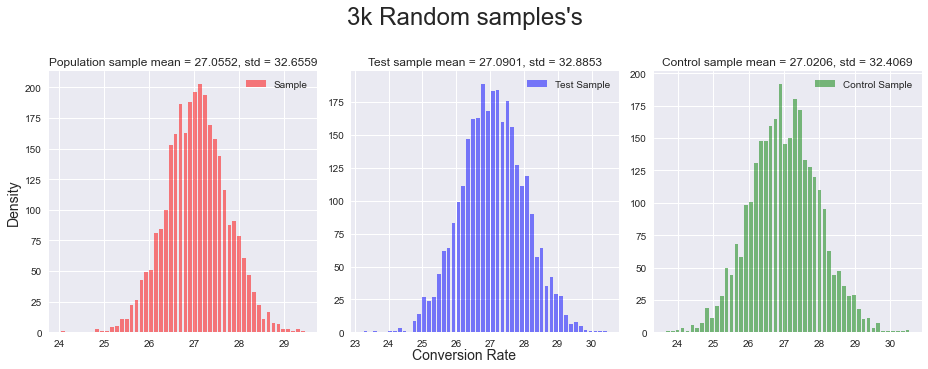

In [68]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13,5))

ax[0].hist(subset_convs, bins=50, color='r', alpha=0.5, rwidth=0.75, label='Sample')
ax[1].hist(test_sub_convs, bins=50, color='b', alpha=0.5, rwidth=0.75, label='Test Sample')
ax[2].hist(cont_sub_convs, bins=50, color='g', alpha=0.5, rwidth=0.75, label='Control Sample')
ax[0].set_ylabel('Density', fontsize=14)
ax[0].set_title(f'Population sample mean = {round(np.mean(subset_convs),4)}, std = {round(np.mean(subset_convs_std),4)}', fontsize=12)
ax[1].set_title(f'Test sample mean = {round(np.mean(test_sub_convs),4)}, std = {round(np.mean(test_sub_convs_std),4)}', fontsize=12)
ax[2].set_title(f'Control sample mean = {round(np.mean(cont_sub_convs),4)}, std = {round(np.mean(cont_sub_convs_std),4)}', fontsize=12)
ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.tight_layout()
fig.text(0.5, 0.001, 'Conversion Rate', ha='center', fontsize=14)
fig.suptitle(f'3k Random samples\'s', fontsize=24)
plt.subplots_adjust(top=.8)
plt.show()